<a href="https://colab.research.google.com/github/ggosti/PythonDataVisualization4Archaeologists/blob/main/07_BasicOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find a more in-depth discussion see **Python3 OpenCV4 start guide.**  
https://farrokhkarimi.github.io/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/LaboratorioPythonDataVisualization4Archaeologists/

/content/drive/MyDrive/LaboratorioPythonDataVisualization4Archaeologists


# Installation in Colab

In colan you need to install opencv but not scikit-image

In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.8.0


# Getting Started with Images

In [ ]:
!wget https://farrokhkarimi.github.io/images/gallery/modals/ice-m.jpg

--2024-06-23 08:19:53--  https://farrokhkarimi.github.io/images/gallery/modals/ice-m.jpg
Resolving farrokhkarimi.github.io (farrokhkarimi.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to farrokhkarimi.github.io (farrokhkarimi.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143430 (140K) [image/jpeg]
Saving to: ‘ice-m.jpg’

ice-m.jpg           100%[===================>] 140.07K  --.-KB/s    in 0.004s  

2024-06-23 08:19:53 (32.5 MB/s) - ‘ice-m.jpg’ saved [143430/143430]



In [ ]:
%ls

ice-m.jpg  sample_data/


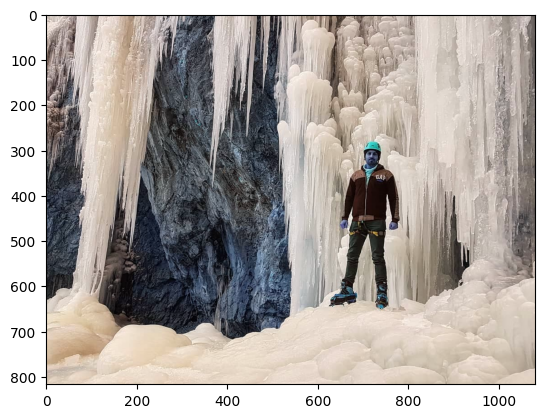

In [ ]:
# loading the image from the disk
image = cv2.imread('ice-m.jpg')

plt.imshow(image)
plt.show()

# `plt.imshow(img)` shows an image with wrong colorspace. we should correct the colorspace

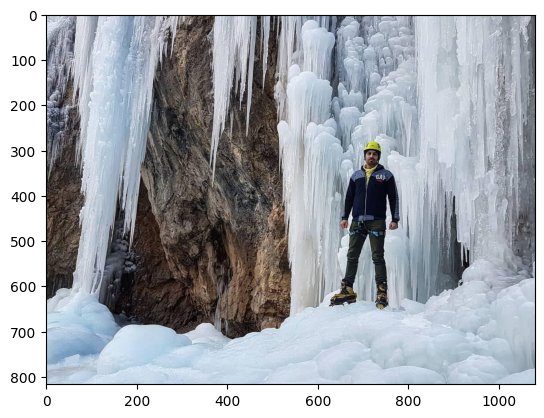

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# listing the folders and files in the current directory using unix command
!ls

image.jpg  sample_data


# Drawing Functions in OpenCV

In [ ]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

In [ ]:
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# Drawing Rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing Circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Drawing Ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [ ]:
# Adding Text to Images
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA);

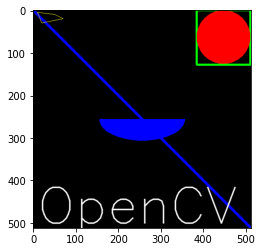

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Basic Operations on Images

In [ ]:
!wget https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true

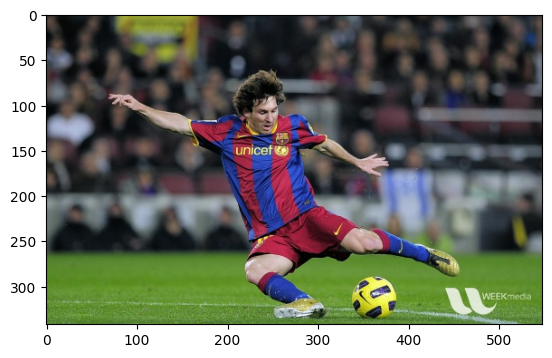

In [ ]:
#messi5 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true')
messi5 = cv2.imread('messi5.jpg?')

messi = messi5.copy()
plt.imshow(messi)
plt.show()

In [ ]:
# accessing and modifying pixel values
px = messi[100,100]
print(px)
messi[100,100] = [255,255,255]
print(messi[100,100])

[200 166 157]
[255 255 255]


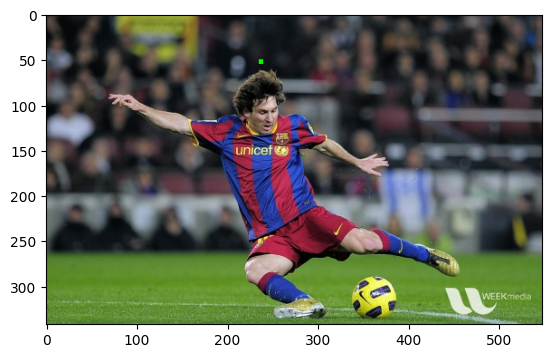

In [ ]:
# changing pixel values
for i in range(5):
    for j in range(5):
        messi[50+i, 235+j] = (0, 255, 0)

plt.imshow(messi)

In [ ]:
# accessing image properties
print(messi.shape)
print(messi.size)
print(messi.dtype)

(342, 548, 3)
562248
uint8


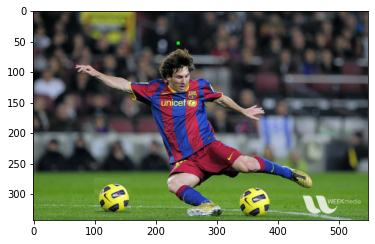

In [ ]:
# image ROI
ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

plt.imshow(messi)

In [ ]:
# splitting and merging image channels
b,g,r = cv2.split(messi)
messi = cv2.merge((b,g,r))

print(r)

[[39 42 44 ... 59 57 54]
 [37 42 46 ... 62 60 57]
 [42 47 51 ... 64 63 60]
 ...
 [56 48 49 ... 60 63 74]
 [52 59 50 ... 56 69 66]
 [43 58 72 ... 49 50 51]]


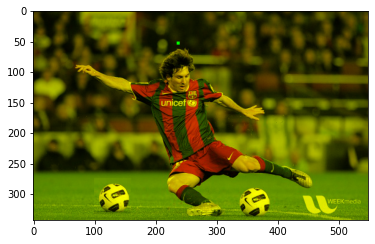

In [ ]:
# set all the red pixles to zero using numpy indexing
messi[:,:,2] = 0

plt.imshow(messi)

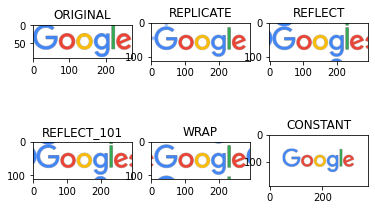

In [ ]:
# making borders for images (padding)
img = io.imread('https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png')

replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255,255])

plt.subplot(231),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')

plt.show()

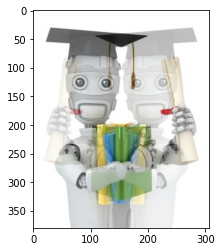

In [ ]:
# image addition
img1 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/ml.png?raw=true')
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst)

# Geometric Transformations of Images

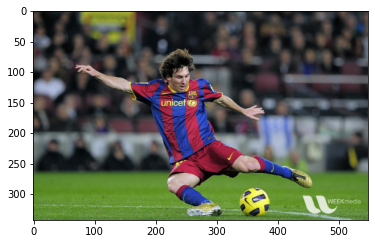

In [ ]:
messi = messi5.copy()
plt.imshow(messi)
plt.show()

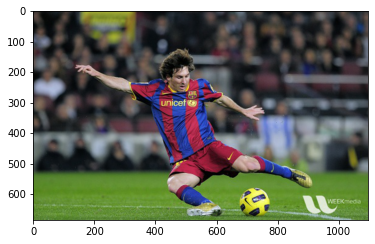

In [ ]:
# Scaling
res = cv2.resize(messi,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

In [ ]:
rows,cols,ch = messi.shape

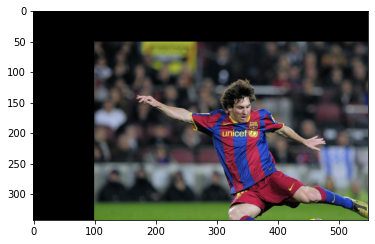

In [ ]:
# Translation
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

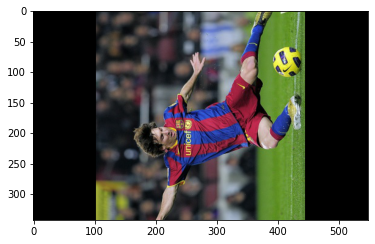

In [ ]:
# Rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

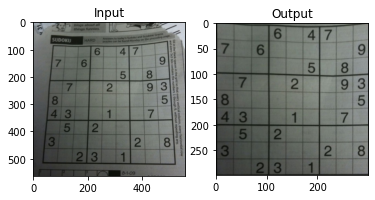

In [ ]:
# Perspective Transformation
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
rows,cols,ch = img.shape
pts1 = np.float32([[73,86],[489,69],[36,514],[520,522]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

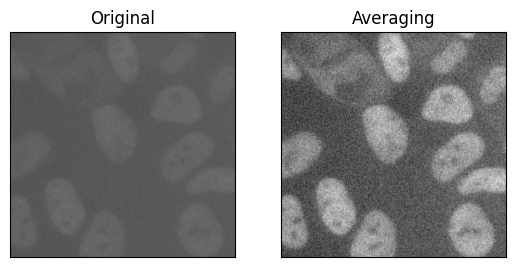

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read the image
original = cv2.imread("0521-1043-day2-ref2-10-x12827-y5929.tif")


img =   (original - original.min())/(original.max()-original.min())


# display the result
plt.subplot(121), plt.imshow(original), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Filters

Simple Linear Filter

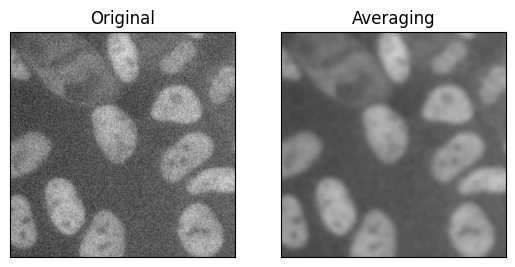

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# prepare a 11x11 averaging filter
kernel = np.ones((11, 11), np.float32)/121
dst = cv2.filter2D(img, -1, kernel)

# change image from BGR space to RGB space
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


## Blur Filter

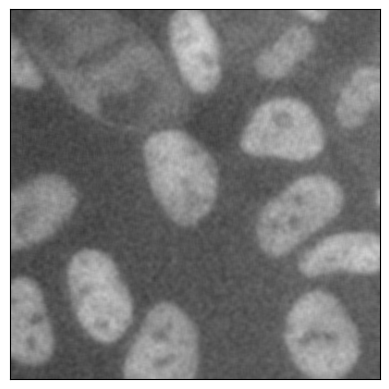

(<matplotlib.image.AxesImage at 0x7ac264626a40>,
 None,
 ([], []),
 ([], []),
 None)

In [18]:
# you can check the docs for further information.
blurred = cv2.blur(img, (5, 5), -1)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blurred), plt.title('blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Vertical gradient

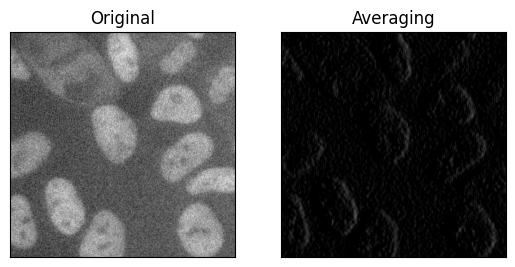

In [21]:
# vertical gradient kernel
# define a random kernel
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# apply it.
filter_v = cv2.filter2D(blurred, -1, vertical_gd)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filter_v), plt.title('vertical gradient')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphological Trasforms

## Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

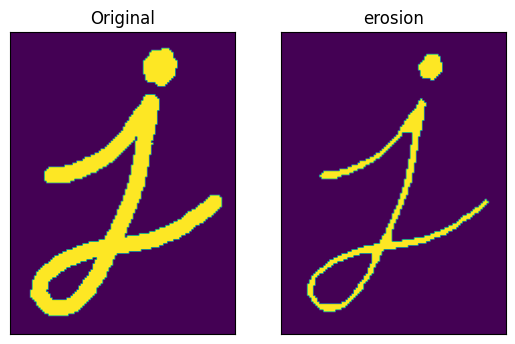

In [22]:
import cv2 as cv
import numpy as np

img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

## Dilation

It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

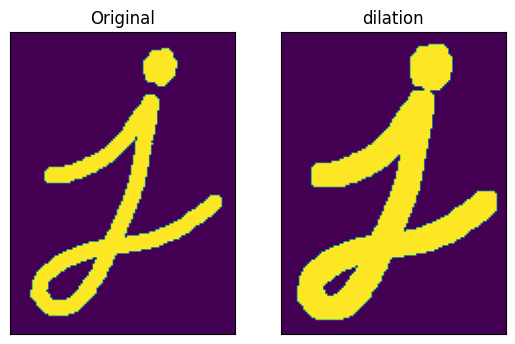

In [23]:
dilation = cv.dilate(img,kernel,iterations = 1)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation), plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

## Opening

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

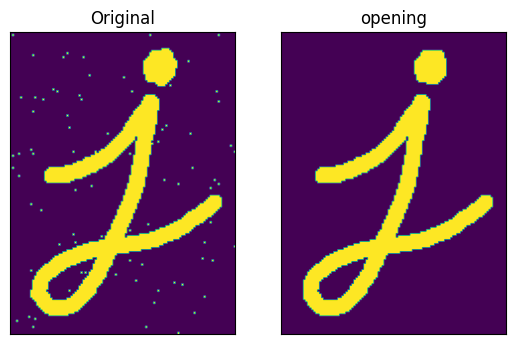

In [34]:
w,h = img.shape
noisyImg = img.copy()
for x,y in zip(np.random.randint(0,w,100),np.random.randint(0,h,100)):
  #print(x,y,noisyImg[x,y])
  if noisyImg[x,y]==0:
    #print(x,y)
    noisyImg[x,y] = img.max()

opening = cv.morphologyEx(noisyImg, cv.MORPH_OPEN, kernel)
# display the result
plt.subplot(121), plt.imshow(noisyImg), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

## Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.


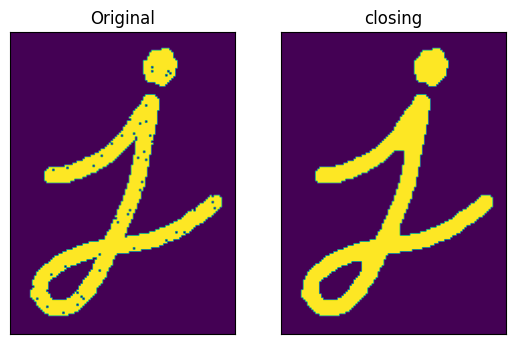

In [41]:
w,h = img.shape
noisyImg = img.copy()
for x,y in zip(np.random.randint(0,w,400),np.random.randint(0,h,400)):
  #print(x,y,noisyImg[x,y])
  if noisyImg[x,y]==img.max():
    #print(x,y)
    noisyImg[x,y] = 0

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
# display the result
plt.subplot(121), plt.imshow(noisyImg), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing), plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

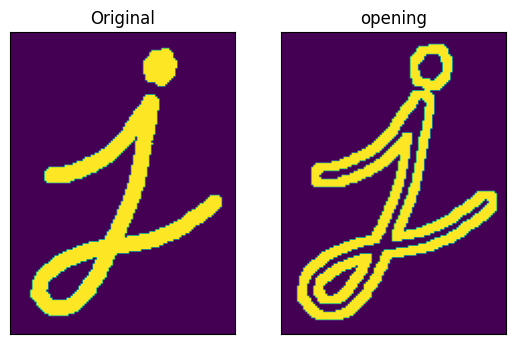

In [40]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

## Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

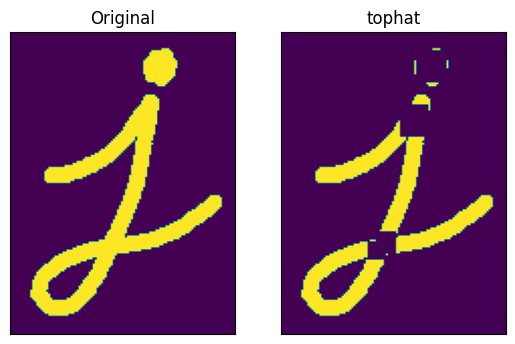

In [49]:
kernel = np.ones((9,9),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

# display the result
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()